# AGE DETECTION

* Scopo del progetto
* Cosa è una CNN e motivo della scelta
* Descrizione dei dataset scelti per il training

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kaggle_faces_path = "../Data/KaggleFacialAge"
kaggle_faces_folders = os.listdir(kaggle_faces_path)
kaggle_faces_folders = np.array(kaggle_faces_folders)
kaggle_faces_folders

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '095', '096', '099', '100', '101', '110'],
      dtype='<U3')

In [3]:
kaggle_images = {}

for folder in kaggle_faces_folders:
    temp_path = os.path.join(kaggle_faces_path, folder)
    n_images = len(os.listdir(temp_path))
    kaggle_images[int(folder)] = n_images
    
kaggle_images    

{1: 1112,
 2: 475,
 3: 284,
 4: 260,
 5: 180,
 6: 114,
 7: 126,
 8: 236,
 9: 159,
 10: 140,
 11: 63,
 12: 106,
 13: 75,
 14: 137,
 15: 143,
 16: 212,
 17: 103,
 18: 181,
 19: 58,
 20: 103,
 21: 136,
 22: 139,
 23: 92,
 24: 191,
 25: 156,
 26: 279,
 27: 126,
 28: 145,
 29: 150,
 30: 109,
 31: 97,
 32: 141,
 33: 46,
 34: 87,
 35: 121,
 36: 112,
 37: 94,
 38: 91,
 39: 136,
 40: 85,
 41: 56,
 42: 84,
 43: 52,
 44: 27,
 45: 77,
 46: 61,
 47: 70,
 48: 64,
 49: 99,
 50: 105,
 51: 62,
 52: 133,
 53: 133,
 54: 106,
 55: 52,
 56: 132,
 57: 60,
 58: 96,
 59: 59,
 60: 137,
 61: 50,
 62: 76,
 63: 47,
 64: 29,
 65: 113,
 66: 54,
 67: 47,
 68: 58,
 69: 45,
 70: 53,
 71: 22,
 72: 70,
 73: 31,
 74: 16,
 75: 87,
 76: 35,
 77: 19,
 78: 30,
 79: 16,
 80: 71,
 81: 10,
 82: 29,
 83: 7,
 84: 11,
 85: 130,
 86: 22,
 87: 4,
 88: 17,
 89: 16,
 90: 55,
 91: 1,
 92: 13,
 93: 3,
 95: 3,
 96: 16,
 99: 2,
 100: 2,
 101: 1,
 110: 2}

In [4]:
utk_images = {}
utk_faces_path = "../Data/UTKFace"
utkface_image_names = os.listdir(utk_faces_path)

def finding_age(image_name):
    image_labels = image_name.split('_')
    age = int(image_labels[0])

    return age

for image in utkface_image_names:
    age = finding_age(image)
    if age not in utk_images:
        utk_images[age] = 1
    else:
        utk_images[age] += 1

#Sort the dict
utk_images = dict(sorted(utk_images.items(), key=lambda x: x[0]))

utk_images        

{1: 1282,
 2: 531,
 3: 308,
 4: 283,
 5: 209,
 6: 134,
 7: 143,
 8: 272,
 9: 172,
 10: 158,
 11: 65,
 12: 132,
 13: 82,
 14: 164,
 15: 180,
 16: 253,
 17: 159,
 18: 263,
 19: 99,
 20: 285,
 21: 349,
 22: 396,
 23: 426,
 24: 861,
 25: 735,
 26: 2206,
 27: 616,
 28: 921,
 29: 571,
 30: 725,
 31: 352,
 32: 665,
 33: 143,
 34: 410,
 35: 881,
 36: 483,
 37: 293,
 38: 325,
 39: 268,
 40: 526,
 41: 132,
 42: 266,
 43: 158,
 44: 100,
 45: 440,
 46: 153,
 47: 172,
 48: 154,
 49: 148,
 50: 381,
 51: 138,
 52: 232,
 53: 242,
 54: 356,
 55: 269,
 56: 239,
 57: 98,
 58: 273,
 59: 82,
 60: 298,
 61: 164,
 62: 127,
 63: 103,
 64: 50,
 65: 262,
 66: 78,
 67: 95,
 68: 102,
 69: 56,
 70: 148,
 71: 35,
 72: 100,
 73: 63,
 74: 32,
 75: 153,
 76: 60,
 77: 30,
 78: 71,
 79: 23,
 80: 134,
 81: 23,
 82: 40,
 83: 18,
 84: 26,
 85: 161,
 86: 36,
 87: 11,
 88: 35,
 89: 35,
 90: 90,
 91: 2,
 92: 13,
 93: 5,
 95: 10,
 96: 17,
 99: 9,
 100: 12,
 101: 2,
 103: 1,
 105: 5,
 110: 6,
 111: 1,
 115: 3,
 116: 4}

In [5]:
def mergeDict(dict_1, dict_2):
    merged_dict = {**dict_1, **dict_2}
    for key, value in merged_dict.items():
        if key in dict_1 and key in dict_2:
            merged_dict[key] = dict_1[key] + dict_2[key]
    return merged_dict        

combined_images = mergeDict(kaggle_images , utk_images)
combined_images

{1: 2394,
 2: 1006,
 3: 592,
 4: 543,
 5: 389,
 6: 248,
 7: 269,
 8: 508,
 9: 331,
 10: 298,
 11: 128,
 12: 238,
 13: 157,
 14: 301,
 15: 323,
 16: 465,
 17: 262,
 18: 444,
 19: 157,
 20: 388,
 21: 485,
 22: 535,
 23: 518,
 24: 1052,
 25: 891,
 26: 2485,
 27: 742,
 28: 1066,
 29: 721,
 30: 834,
 31: 449,
 32: 806,
 33: 189,
 34: 497,
 35: 1002,
 36: 595,
 37: 387,
 38: 416,
 39: 404,
 40: 611,
 41: 188,
 42: 350,
 43: 210,
 44: 127,
 45: 517,
 46: 214,
 47: 242,
 48: 218,
 49: 247,
 50: 486,
 51: 200,
 52: 365,
 53: 375,
 54: 462,
 55: 321,
 56: 371,
 57: 158,
 58: 369,
 59: 141,
 60: 435,
 61: 214,
 62: 203,
 63: 150,
 64: 79,
 65: 375,
 66: 132,
 67: 142,
 68: 160,
 69: 101,
 70: 201,
 71: 57,
 72: 170,
 73: 94,
 74: 48,
 75: 240,
 76: 95,
 77: 49,
 78: 101,
 79: 39,
 80: 205,
 81: 33,
 82: 69,
 83: 25,
 84: 37,
 85: 291,
 86: 58,
 87: 15,
 88: 52,
 89: 51,
 90: 145,
 91: 3,
 92: 26,
 93: 8,
 95: 13,
 96: 33,
 99: 11,
 100: 14,
 101: 3,
 110: 8,
 103: 1,
 105: 5,
 111: 1,
 115: 3,
 1

In [93]:
total_img = 0

for k, v in combined_images.items():
    total_img += v
    
total_img

33886

In [90]:
#Create a function to divide the images into n groups with similar number of images

def groups(diz, n_groups):
    total_img = 0
    for k, v in diz.items():
        total_img += v
    threshold = int(total_img / (n_groups)) 
    
    groups = []
    tempor = []
    val = 0
    
    for key, value in diz.items():
        val += diz[key]
        if val < threshold*1.2:
            tempor.append(key)
        else:
            groups.append(tempor)
            val = value
            tempor = [key]
           
    groups.append(tempor)
    return groups        
            
prova = {1:12, 2:34, 3:33, 4:9, 5:43, 6:61, 7:22, 8:18}
gr = groups(prova, 3)     
print(gr, "\n-----------------------------------")

grs = groups(combined_images, 8)
print(grs)

[[1, 2, 3, 4], [5], [6, 7], [8]] 
-----------------------------------
[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [22, 23, 24, 25], [26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37], [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75], [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99, 100, 101, 110, 103, 105, 111, 115, 116]]


1. Fare un dataframe con label, age range, number of images, % of total
1. Fare dataframe con nome file, età, label

In [98]:
#Creazione lista contenente le info nel punto 1
#Parlare riguardo class imbalance
res = []

for index, value in enumerate(grs):
    temp = 0
    for num in value:
        temp += combined_images[num]
    res.append([index, str(value[0])+'-'+str(value[-1]), temp, str(round(temp/total_img*100,3)) + '%'])

res

[[0, '1-5', 4924, '14.531%'],
 [1, '6-21', 5002, '14.761%'],
 [2, '22-25', 2996, '8.841%'],
 [3, '26-29', 5014, '14.797%'],
 [4, '30-37', 4759, '14.044%'],
 [5, '38-52', 4795, '14.15%'],
 [6, '53-75', 4998, '14.749%'],
 [7, '76-116', 1398, '4.126%']]

In [106]:
#Trasformare la lista in un dataframe e poi csv
df = pd.DataFrame(res, columns =['Label', 'Age-Range', '#Images', '%Total']) 
os.makedirs('Stats', exist_ok=True) 
df.to_csv('Stats/data_stats.csv')
print(df)

   Label Age-Range  #Images   %Total
0      0       1-5     4924  14.531%
1      1      6-21     5002  14.761%
2      2     22-25     2996   8.841%
3      3     26-29     5014  14.797%
4      4     30-37     4759  14.044%
5      5     38-52     4795   14.15%
6      6     53-75     4998  14.749%
7      7    76-116     1398   4.126%


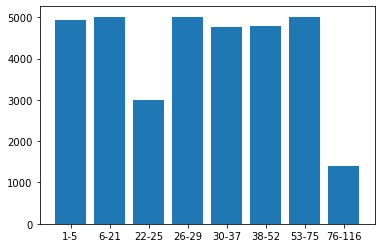

In [115]:
#Fare grafico a barre con le percentuali del totale

# Choose the height of the bars
height = []
bars = []
for elem in res:
    height.append(elem[2])
    bars.append(elem[1])

# Choose the names of the bars
x_pos = np.arange(len(tuple(bars)))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, tuple(bars), color='black')
plt.yticks(color='black')

# Show graphic
plt.show()